# Práctica 1: Aprendizaje automático

__Fecha de entrega: 30 de marzo de 2023__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: 12__

__Nombres de los estudiantes: Greta Angolani y Héloïse Lafargue__

# Apartado 1: Clustering

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `Mall_Customers.csv` que se proporciona junto con la práctica. 

El conjunto de datos contiene por cada fila los datos de un préstamo que fue concedido por una empresa de crédito p2p. Las variables que caracterizan el préstamo son las siguientes:
  - `Customer ID` es el identificador del cliente
  - `Gender` es el género del cliente (Male|Female)
  - `Annual Income` son los ingresos anuales en cientos de dólares del cliente
  - `Age` es la edad del cliente
  - `Spending Score` es una puntuación asignada por el mall basada en el comportamiento del cliente y a sus gastos

In [1]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/IA2/p2/Mall_Customers.csv', index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

#### Descripcion de los datos

1. CustomerID: El identificador único dado a un cliente

2. Gender: Genero del cliente

3. Age: Edad del cliente

4. Annual Income(k$): Los ingresos anuales del cliente

5. Spending Score: La puntuación(sobre 100) otorgada a un cliente por las autoridades del centro comercial, basada en el dinero gastado y el comportamiento del cliente.



#### Distribuciones de cada una de las variables numéricas

Aqui esta las medias, desviaciones típicas, rangos... de las variables

In [3]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [4]:
# Frecuencia de las clases
df['Gender'].value_counts() / df['Gender'].count() * 100

Female    56.0
Male      44.0
Name: Gender, dtype: float64

Las clases a predecir están quasi equilibradas con el 56%  de datos para mujeres y el 44% de datos para hombres.

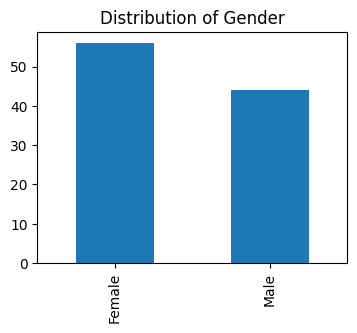

In [5]:
import matplotlib.pyplot as plt

# Distribution of gender
plt.figure(figsize=(4,3))
(df['Gender'].value_counts() / df['Gender'].count() * 100).sort_index().plot.bar()
plt.title('Distribution of Gender');
plt.show();


#### Diagrama de dispersión entre cada variable y Distribuciones de cada variable:

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Age'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Annual Income (k$)'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Annual Income (k$)'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>],
       [<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Spending Score (1-100)'>]],
      dtype=object)

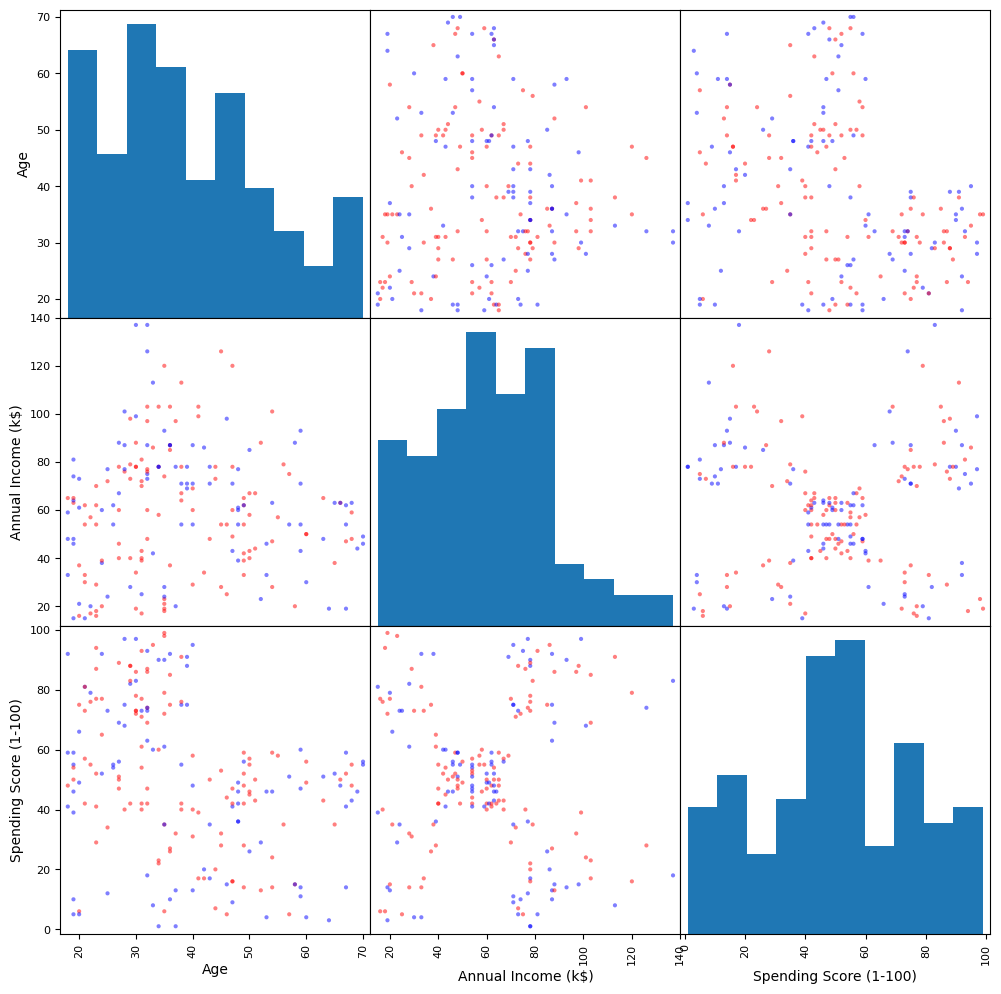

In [6]:
from pandas.plotting import scatter_matrix
%matplotlib inline

dic_colors = {'Male': 'blue', 'Female': 'red'}
colors = df['Gender'].map(dic_colors)
data_select = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scatter_matrix(data_select, figsize = (12, 12), diagonal = 'hist', color=colors)


Con este diagrama vemos que no hay correlacion entre las variables en cuanto a la edad. 

En efecto, una nube de puntos muy próximos en la misma diagonal indica una fuerte correlación. 

Asi vemos que el unico par de variables candidato para separar las clases (Male/Female) es: Spending Score/ Anual Income.

Text(0.5, 1.0, 'Correlación de las variables')

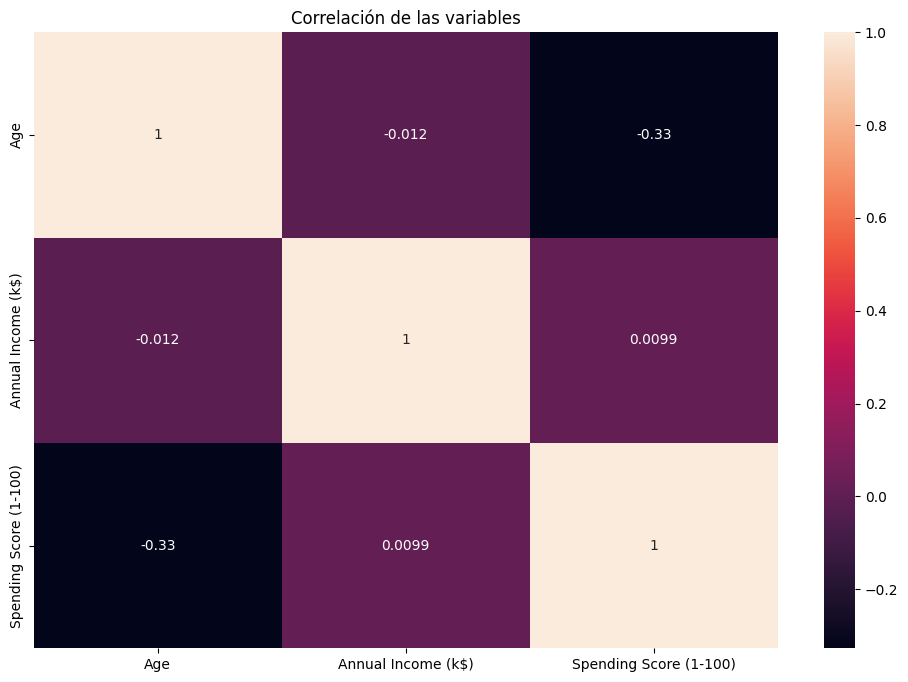

In [7]:
import seaborn as sns
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlación de las variables')

No se nota una gran correlación entre los variables.


### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

Gender
Female    Axes(0.125,0.11;0.775x0.77)
Male      Axes(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

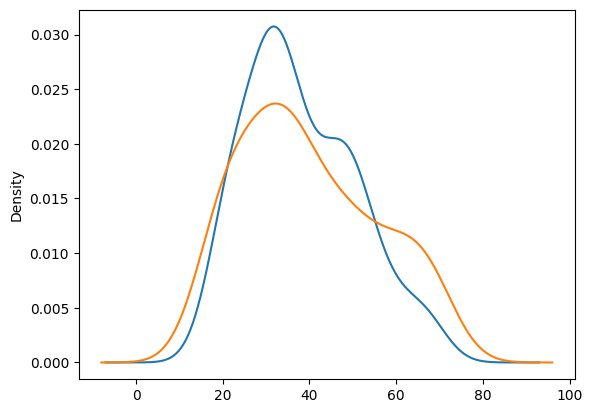

In [8]:
df.groupby(df['Gender'])["Age"].plot(kind="density")

Gender
Female    Axes(0.125,0.11;0.775x0.77)
Male      Axes(0.125,0.11;0.775x0.77)
Name: Annual Income (k$), dtype: object

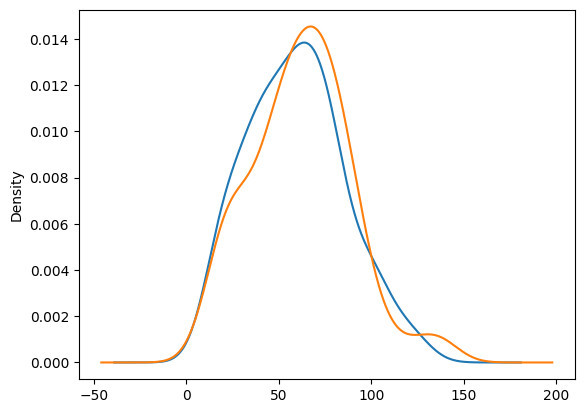

In [9]:
df.groupby(df['Gender'])["Annual Income (k$)"].plot(kind="density")

Gender
Female    Axes(0.125,0.11;0.775x0.77)
Male      Axes(0.125,0.11;0.775x0.77)
Name: Spending Score (1-100), dtype: object

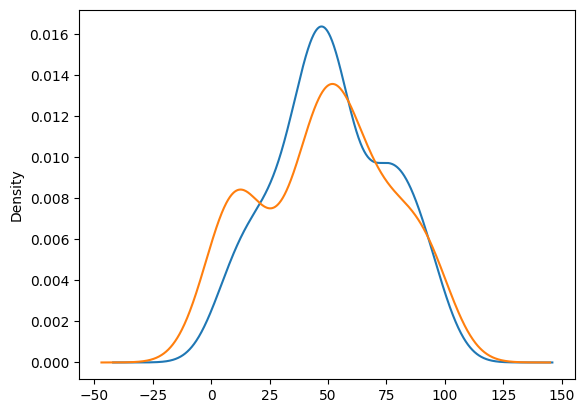

In [10]:
df.groupby(df['Gender'])["Spending Score (1-100)"].plot(kind="density")

Para las variables Annual income y spending score, las distribuciones   son centradas en 50 y no hay una variable con valores mucho más grandes que otra.
Mientras Age es centrada en 40 y su densidad es diferente de la de las dos otras variable.

Distribution related to gender
----------------------------------------------------------------------


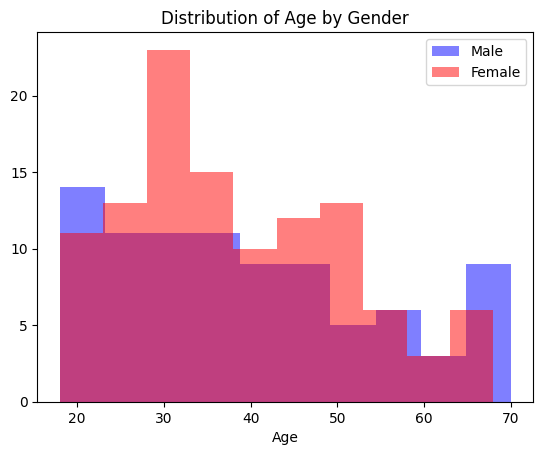

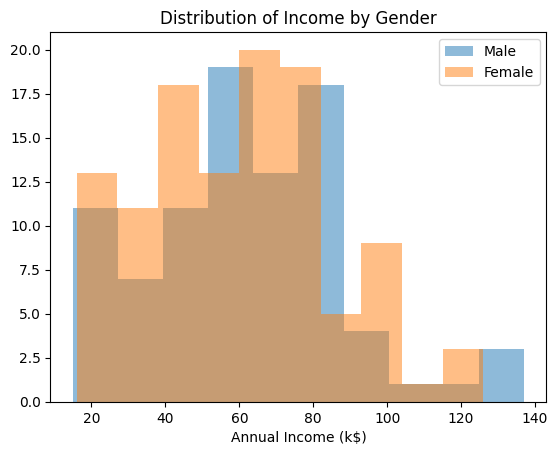

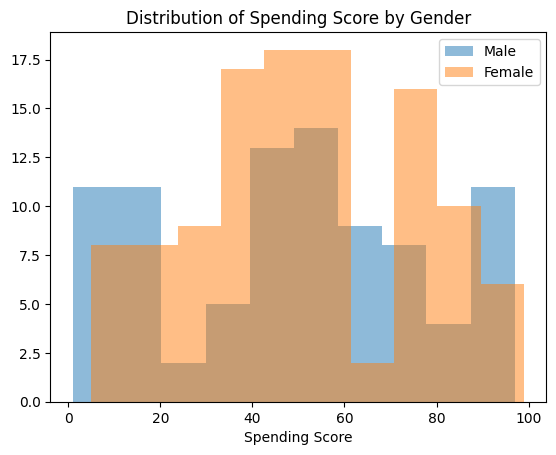

In [11]:
### Distribution related to gender

print('Distribution related to gender')
print('-'*70)

# Histogram of ages by gender
plt.hist('Age', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male', color = 'b');
plt.hist('Age', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female', color = 'r');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();
plt.show();

# Histogram of income by gender
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Annual Income (k$)');
plt.legend();
plt.show();

# Histogram of Spending Score (1-100) by gender
plt.hist('Spending Score (1-100)', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Spending Score (1-100)', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Spending Score by Gender');
plt.xlabel('Spending Score');
plt.legend();
plt.show();

Se observa tendencias comunes sobre todo para el "Income" por généro. La distribucion de las edades varian por género, lo muy diferente es que hay mucho mas mujeres entre 25 y 40 anos que hombres.

## 3) Preprocesar los datos

Para el clustering vamos a trabajar solamente con las variables `Annual income`, y `spending score`.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de clientes similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

Gender
Female    Axes(0.125,0.11;0.775x0.77)
Male      Axes(0.125,0.11;0.775x0.77)
Name: Spending Score (1-100), dtype: object

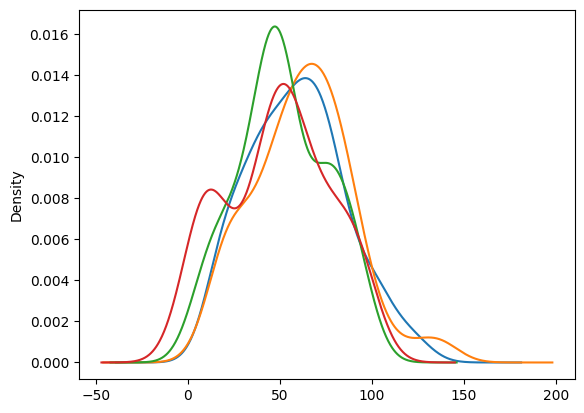

In [12]:
df.groupby(df['Gender'])["Annual Income (k$)"].plot(kind="density")
df.groupby(df['Gender'])["Spending Score (1-100)"].plot(kind="density")

El algoritmo k-means es muy sensible al rango de las variables. Pero aqui, como vemos con las distribuciones, las variables Annual income y spending score no toman valores mucho más grandes que otra. Por ese motivo, no se necesita normalizar o estandarizar las variables antes de intentar agruparlas.

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo y el índice davies_boulding en función del número de clusters.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

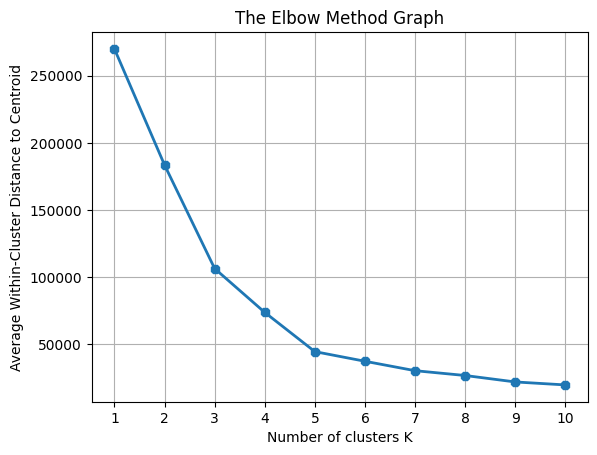

In [13]:
from sklearn.cluster import KMeans
import numpy as np

# Use the KMeans class from the sklearn library
# The loop will fit the k-means algorithm to the data and then compute 
# the within cluster sum of squares and appended to the wcss list.
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++", max_iter=400)
    kmeans.fit(df.iloc[:,2:]) # trabajamos solamente con las variables Annual income, y spending score
    wcss.append(kmeans.inertia_)
    
plt.figure()
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, marker ="8")
plt.title('The Elbow Method Graph')
plt.xlabel("Number of clusters K")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Average Within-Cluster Distance to Centroid")
plt.show()


Aplicando el algoritmo k-means al conjunto de datos y de acuerdo con el gráfico del codo determinamos el punto del codo en K = 5. Así que elegimos 5.

In [14]:
import numpy as np
from sklearn.metrics import davies_bouldin_score

K_MAX = 8
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    km.fit(df.iloc[:,2:])  # trabajamos solamente con las variables Annual income, y spending score
    davies_boulding[k-2] = davies_bouldin_score(df.iloc[:,2:], km.labels_) 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

A continuación pintamos el valor del índice de Davies–Bouldin para distintos valores de K. Podemos observar que el mejor valor (el más pequeño) se obtiene para k = 5.

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

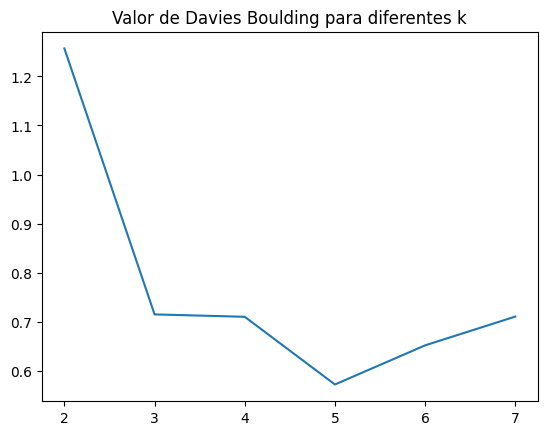

In [15]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema. ¿Qué perfil de clientes quedan en cada cluster? 

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

En primer lugar, podemos ver fácilmente los centroídes elegidos, es decir, el valor que toman las variables Annual income y Spending score en el individuo prototípico de cada cluster.

In [16]:
km = KMeans(init='random', n_clusters=5, random_state=333)
km.fit(df.iloc[:,2:]) # trabajamos solamente con las variables Annual income, y spending score

centers = km.cluster_centers_
centers

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [17]:
km = KMeans(n_clusters=5, init ='k-means++', max_iter=400, n_init=10,random_state=0 )
clusters = km.fit_predict(df.iloc[:,2:])
df["label"] = clusters
df.groupby(["label"]).describe().transpose()

label                                  0          1           2          3  \
Age                    count   35.000000  81.000000   39.000000  22.000000   
                       mean    41.114286  42.716049   32.692308  25.272727   
                       std     11.341676  16.447822    3.728650   5.257030   
                       min     19.000000  18.000000   27.000000  18.000000   
                       25%     34.000000  27.000000   30.000000  21.250000   
                       50%     42.000000  46.000000   32.000000  23.500000   
                       75%     47.500000  54.000000   35.500000  29.750000   
                       max     59.000000  70.000000   40.000000  35.000000   
Annual Income (k$)     count   35.000000  81.000000   39.000000  22.000000   
                       mean    88.200000  55.296296   86.538462  25.727273   
                       std     16.399067   8.988109   16.312485   7.566731   
                       min     70.000000  39.000000   69.000000  15.000000   
                       25%     77.500000  48.000000   75.500000  19.250000   
                       50%     85.000000  54.000000   79.000000  24.500000   
                       75%     97.500000  62.000000   95.000000  32.250000   
                       max    137.000000  76.000000  137.000000  39.000000   
Spending Score (1-100) count   35.000000  81.000000   39.000000  22.000000   
                       mean    17.114286  49.518519   82.128205  79.363636   
                       std      9.952154   6.530909    9.364489  10.504174   
                       min      1.000000  34.000000   63.000000  61.000000   
                       25%     10.000000  44.000000   74.500000  73.000000   
                       50%     16.000000  50.000000   83.000000  77.000000   
                       75%     23.500000  55.000000   90.000000  85.750000   
                       max     39.000000  61.000000   97.000000  99.000000   

label                                 4  
Age                    count  23.000000  
                       mean   45.217391  
                       std    13.228607  
                       min    19.000000  
                       25%    35.500000  
                       50%    46.000000  
                       75%    53.500000  
                       max    67.000000  
Annual Income (k$)     count  23.000000  
                       mean   26.304348  
                       std     7.893811  
                       min    15.000000  
                       25%    19.500000  
                       50%    25.000000  
                       75%    33.000000  
                       max    39.000000  
Spending Score (1-100) count  23.000000  
                       mean   20.913043  
                       std    13.017167  
                       min     3.000000  
                       25%     9.500000  
                       50%    17.000000  
                       75%    33.500000  
                       max    40.000000

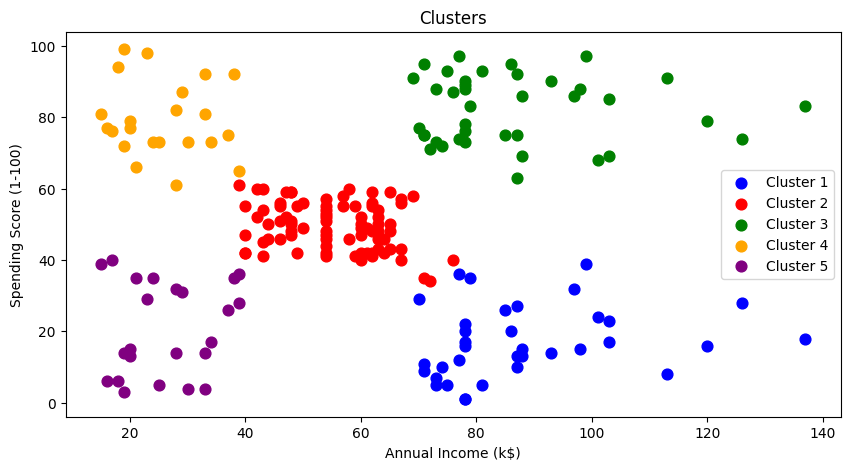

In [18]:
# Visualize the clusters
plt.figure(figsize=(10,5))
plt.scatter(df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60, label='Cluster 1')
plt.scatter(df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60, label='Cluster 2')
plt.scatter(df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60, label='Cluster 3')
plt.scatter(df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60, label='Cluster 4')
plt.scatter(df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60, label='Cluster 5')
plt.title('Clusters')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

**Análisis de los clusters**

Podemos ver que los clientes pueden agruparse a grandes rasgos en 5 grupos en función de sus compras.

En el cluster 5 (violeta):
Las personas tienen ingresos anuales bajos y una puntuación de gasto baja, esto es bastante razonable ya que las personas que tienen salarios bajos prefieren comprar menos, de hecho, estas son las personas prudentes que saben cómo gastar y ahorrar dinero. Las tiendas/centros comerciales estarán menos interesados en las personas pertenecientes a este grupo.

En el cluster 4 (naranja):
Las personas tienen ingresos bajos pero puntuaciones de gasto más altas, se trata de aquellas personas a las que les encanta comprar productos más a menudo a pesar de tener ingresos bajos. Quizá se deba a que estas personas están más que satisfechas con los servicios del centro comercial. Puede que las tiendas o centros comerciales no se dirijan a estas personas con tanta eficacia, pero aun así no las perderán.

En el cluster 2 (rojo):
Las personas tienen unos ingresos medios y un nivel de gasto medio. De nuevo, estas personas no serán el objetivo principal de las tiendas o centros comerciales, pero se les tendrá en cuenta y se podrán utilizar otras técnicas de análisis de datos para aumentar su nivel de gasto.

En el cluster 3 (verde):
Las personas tienen ingresos elevados y una puntuación de gasto alta, este es el caso ideal para el centro comercial o las tiendas, ya que estas personas son las principales fuentes de beneficios. Estas personas podrían ser los clientes habituales del centro comercial y están convencidos de las instalaciones del centro comercial.

En el cluster 1 (azul):
Las personas tienen ingresos altos pero puntuaciones de gasto bajas, esto es interesante. Tal vez se trate de personas insatisfechas o descontentas con los servicios del centro comercial. Estos pueden ser los principales objetivos del centro comercial, ya que tienen potencial para gastar dinero. Por lo tanto, las autoridades del centro comercial intentarán añadir nuevas instalaciones para atraer a estas personas y satisfacer sus necesidades.

Por último, basándonos en nuestra técnica de aprendizaje automático, podemos deducir que, para aumentar los beneficios del centro comercial, las autoridades del centro deberían centrarse en las personas pertenecientes a los grupos 1 y 2, así como mantener sus estándares para que las personas pertenecientes a los grupos 3 y 4 estén contentas y satisfechas.

Para concluir, el aprendizaje automático tiene un papel muy importante para aumentar los beneficios en las empresas. Existe una verdadera perspectiva en este ambito para mejorar las ventas.

## 6) Clustering jerárquico aglomerativo
Repite los apartados 4 y 5 usando clustering jerárquico aglomerativo.



In [19]:
from sklearn.cluster import AgglomerativeClustering

K_MAX = 8
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    # Crear una instancia del agrupador jerárquico aglomerativo
    ag = AgglomerativeClustering(n_clusters=k, linkage='ward', affinity='euclidean')
    # Agrupar los puntos en clusters
    ag.fit(df.iloc[:,2:]) # trabajamos solamente con las variables Annual income, y spending score
    # Podemos consultar el cluster asignado a cada punto
    labels = ag.labels_
    #plot_clusters(X, ag.labels_)
    
    davies_boulding[k-2] = davies_bouldin_score(df.iloc[:,2:], ag.labels_) 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be remo

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

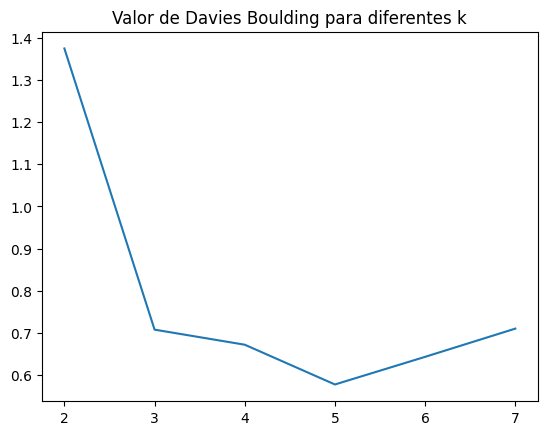

In [20]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

Encontramos el mismo numero optimo de cluster, es decir k=5.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


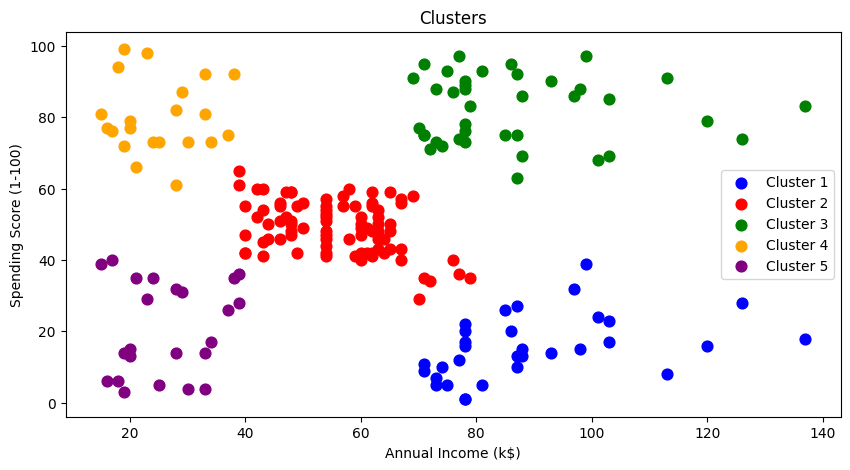

In [21]:
ag = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')
ag.fit(df.iloc[:,2:]) # trabajamos solamente con las variables Annual income, y spending score
clusters = ag.fit_predict(df.iloc[:,2:])
df["label"] = clusters

# Visualize the clusters
plt.figure(figsize=(10,5))
plt.scatter(df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60, label='Cluster 1')
plt.scatter(df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60, label='Cluster 2')
plt.scatter(df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60, label='Cluster 3')
plt.scatter(df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60, label='Cluster 4')
plt.scatter(df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60, label='Cluster 5')
plt.title('Clusters')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

Los resultados de los cluster son los mismos que con K-means.

Podemos tambien dibujar el dendrograma de la jerarquía de clusters.Nos limitamos a dibujar sólo los primeros niveles del árbol.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


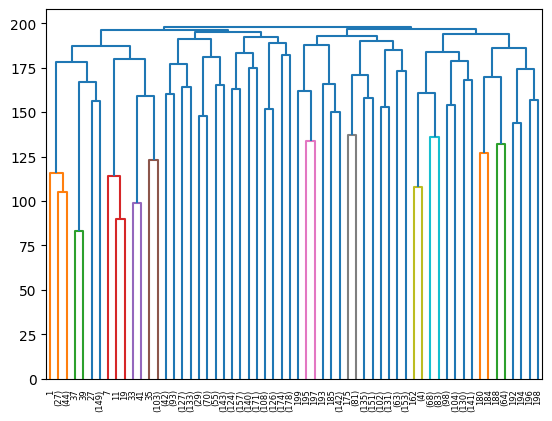

In [22]:
# Sciki-learn no pinta el dendrograma, pero scipy sí, 
# la siguiente función permite usar el modelo ajustado por scikit learn para pintar el dendrograma
# https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    


ag = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')
ag.fit(df.iloc[:,2:])

# Dibujar los primeros 5 niveles del árbol
levels = 5
plot_dendrogram(ag, p=levels, truncate_mode='level')

# Árbol completo
#plot_dendrogram(ag)